## Smart Cargo Loading Plan Using GA Optimization 
#### Done by :
    Hutoon Alomran
    Lena Alsuwailem
    Rana Alhababi 
    Hajar Alomar

In [1]:
import numpy as np 
import pandas as pd 
import random
import math
import matplotlib.pyplot as plt

In [2]:
#Creating the initial Population Function
def Create_Initial_Population(size):
    global pop_size
    pop_size = (size,size) #Defining the population size
    Initial_Population = np.random.randint(1, Containers+1, size=pop_size)
    return Initial_Population

In [3]:
#Creating the Fitness Function
def Compute_Fitness(ItemWeights, pop):
    containerScore = [0]*Containers
    
    for x in range(len(pop)):
        #Storing each item(Weight) in its possible container
        containerScore[pop[x]-1] += ItemWeights[x]   
    
    #Compute the fitnessScore of each solution
    max = 0
    min=0
    for i in range(Containers):
        if containerScore[i] > containerScore[max]:
            max = i
        if containerScore[i] < containerScore[min]:
            min = i
    global fitnessScore 
    fitnessScore = containerScore[max] - containerScore[min]
    return fitnessScore

In [4]:
# tournament selection
global selection_a
global selection_b

def Binary_Tournament_Selection(Initial_Population, fitnessScore):
    selection_a = np.random.randint(len(Initial_Population))
    selection_b = np.random.randint(len(Initial_Population))
    if(selection_b != selection_a):
        if fitnessValue[selection_a] < fitnessValue[selection_b]:
            return Initial_Population[selection_a]
        else:
            return Initial_Population[selection_b]
    else:
        while(selection_b==selection_a ):
            selection_b = np.random.randint(len(Initial_Population))
        if fitnessValue[selection_a] < fitnessValue[selection_b]:
            return Initial_Population[selection_a]
        else:
            return Initial_Population[selection_b]


In [5]:

def crossover(p1,p2) :
    
    #Initialliy child is equal to parent 1 and child 2 is equal to parent 2
    c1 = list(p1) #convert to array
    c2 = list(p2)
    
    #Selecting random point less than the size of individual
    point = random.randint(0,len(Initial_Population)-2)
    
    #Swapping values starting from selected random point to end of length
    for i in range(point+1, len(selected_parents[0])):
        
        # 1st Child's left side will contain the values of parent 1 and in right side it will store values of parent 2 from selected point to last
        # 2nd Child's left side will contain the values of parent 2 and in right side it will store values of parent 1 from selected point to last
        
        c1[i], c2[i] = p2[i], p1[i] #swaping
    
    #return both childs
    return c1,c2

In [6]:
def Mutation_Fuction(k,c1,c2):
    for i in range(0,k):
        gene = random.randint(1,Containers)
        
        position = random.randint(0,len(Initial_Population)-1) 
        c1[position]=gene
        c2[position]=gene
    return c1,c2

# Performing all the Experiments on instance 1

In [31]:
#Instance1: number of items n=200, items weights option 1, number of containers c=10

# Experiment 1

In [32]:
Containers = int(input("Please enter the number of containers(c): "))
Items = int(input("Please enter the number of items(𝑛): "))

#list of Item weights
ItemWeights=[]

#taking user option to set weights
opt = int(input("\nPlease choose one of the following options:\n[1] for weight i/2\n[2] for weight i^2/2 \nYour option:  "))
if opt == 1:
    for x in range(int(Items)):
        i = x+1
        #Option "1" for weights (i/2)
        ItemWeights.append(i/2) 
if opt == 2:
    for x in range(int(Items)):
        i = x+1
        #Option "2" for weights (i^2/2)
        ItemWeights.append(i**2/2) 

#Print the Search Space:
print("\nSearch Space: ")
print(Items**Containers)


Please enter the number of containers(c): 10
Please enter the number of items(𝑛): 200

Please choose one of the following options:
[1] for weight i/2
[2] for weight i^2/2 
Your option:  1

Search Space: 
102400000000000000000000


In [33]:
max_fitness_of_generation = 0.0
max_fitness_scores = []

for i in range(0,5):
    #Calling the initial Population Function
    Initial_Population=Create_Initial_Population(10)
    
    for val in range(0,10000):
        fitnessValue = []
        for i in range(len(Initial_Population)):
            fitness = Compute_Fitness(ItemWeights, Initial_Population[i])
            fitnessValue.append(fitness)
            
        max_fitness = max(fitnessValue)
        
        if(max_fitness > max_fitness_of_generation):
            max_fitness_of_generation = max_fitness
            
        # select parents
        selected_parents = []
        selected_parents = [Binary_Tournament_Selection(Initial_Population, fitnessValue)for _ in range(2)]
        p1 = selected_parents[0]
        p2 = selected_parents[1]
        global c1
        global c2
        c1 = []
        c2 = []
        
        c1,c2 = crossover(p1,p2)
        Mutation_Fuction(1,c1,c2)
        
        child1 = []
        child1[:0] = c1
        child2 = []
        child2[:0] = c2
    
        for i in range(0, len(child1)):
            child1[i] = int(child1[i])
        for i in range(0, len(child2)):
            child2[i] = int(child2[i])
            
            
        #Computing their Fitness
        c1Fitness = Compute_Fitness(ItemWeights, child1)
        c2Fitness = Compute_Fitness(ItemWeights, child2)
        
        #Generating new POPULATION
        if(c1Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))]= child1
                               
        if(c2Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))] = child2
            
        #Printing new generated POPULATION
        new_population = Initial_Population
    max_fitness_scores.append(max_fitness_of_generation)  

In [34]:
print(max_fitness_scores)

[13.0, 13.0, 13.0, 13.0, 13.0]


Text(0, 0.5, 'Fitness Scores')

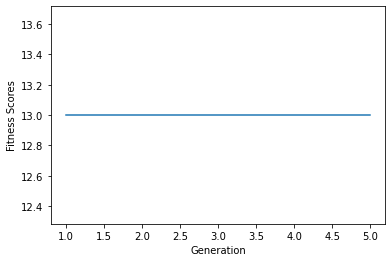

In [35]:
generation = [1, 2, 3, 4, 5]
plt.plot(generation,max_fitness_scores)
plt.xlabel('Generation')
plt.ylabel('Fitness Scores')

# Experiment 2

In [36]:
max_fitness_of_generation = 0.0
max_fitness_scores = []

for i in range(0,5):
    #Calling the initial Population Function
    Initial_Population=Create_Initial_Population(100)
    for val in range(0,10000):
        fitnessValue = []
        for i in range(len(Initial_Population)):
            
            fitness = Compute_Fitness(ItemWeights, Initial_Population[i])
            fitnessValue.append(fitness)
        max_fitness = max(fitnessValue)
        if(max_fitness > max_fitness_of_generation):
            max_fitness_of_generation = max_fitness
        # select parents
        selected_parents = []
        
        selected_parents = [Binary_Tournament_Selection(Initial_Population, fitnessValue)for _ in range(2)]
    
        p1 = selected_parents[0]
        p2 = selected_parents[1]
        
        global c1
        global c2
        c1 = []
        c2 = []
        c1,c2 = crossover(p1,p2)
        Mutation_Fuction(1,c1,c2)
        
    

        child1 = []
        child1[:0] = c1
        child2 = []
        child2[:0] = c2
    
        for i in range(0, len(child1)):
            child1[i] = int(child1[i])
        for i in range(0, len(child2)):
            child2[i] = int(child2[i])


        #Computing their Fitness
        c1Fitness = Compute_Fitness(ItemWeights, child1)
        c2Fitness = Compute_Fitness(ItemWeights, child2)
        
        #Generating new POPULATION
        if(c1Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))]= child1
                               
        if(c2Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))] = child2
            
        new_population = Initial_Population
    max_fitness_scores.append(max_fitness_of_generation)

In [37]:
print(max_fitness_scores)

[507.0, 507.5, 507.5, 560.0, 560.0]


Text(0, 0.5, 'Fitness Scores')

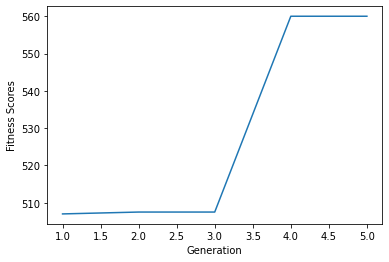

In [38]:
generation = [1, 2, 3, 4, 5]
plt.plot(generation,max_fitness_scores )
plt.xlabel('Generation')
plt.ylabel('Fitness Scores')

# Experiment 3

In [39]:

max_fitness_of_generation = 0.0
max_fitness_scores = []
for i in range(0,5):
    #Calling the initial Population Function
    Initial_Population=Create_Initial_Population(10)
    for val in range(0,10000):
        fitnessValue = []
        for i in range(len(Initial_Population)):
            
            fitness = Compute_Fitness(ItemWeights, Initial_Population[i])
            fitnessValue.append(fitness)
        max_fitness = max(fitnessValue)
        if(max_fitness > max_fitness_of_generation):
            max_fitness_of_generation = max_fitness
        # select parents
        selected_parents = []
        
        selected_parents = [Binary_Tournament_Selection(Initial_Population, fitnessValue)for _ in range(2)]
        p1 = selected_parents[0]
        p2 = selected_parents[1]
        
        global c1
        global c2
        c1 = []
        c2 = []
        c1,c2 = crossover(p1,p2)
        Mutation_Fuction(5,c1,c2)
        
    
    
        child1 = []
        child1[:0] = c1
        child2 = []
        child2[:0] = c2
    
        for i in range(0, len(child1)):
            child1[i] = int(child1[i])
        for i in range(0, len(child2)):
            child2[i] = int(child2[i])


        #Computing their Fitness
        c1Fitness = Compute_Fitness(ItemWeights, child1)
        c2Fitness = Compute_Fitness(ItemWeights, child2)
        
        #Generating new POPULATION
        if(c1Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))]= child1
                               
        if(c2Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))] = child2

        new_population = Initial_Population
    max_fitness_scores.append(max_fitness_of_generation)

In [40]:
print(max_fitness_scores)

[9.0, 11.5, 12.0, 12.0, 12.0]


Text(0, 0.5, 'Fitness Scores')

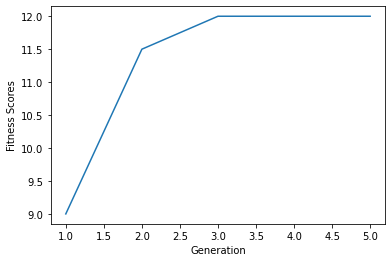

In [41]:
generation = [1, 2, 3,4,5]
plt.plot(generation,max_fitness_scores )
plt.xlabel('Generation')
plt.ylabel('Fitness Scores')

# Experiment 4

In [42]:
max_fitness_of_generation = 0.0
max_fitness_scores = []
for i in range(0,5):
    #Calling the initial Population Function
    Initial_Population=Create_Initial_Population(100)
    for val in range(0,10000):
        fitnessValue = []
        for i in range(len(Initial_Population)):
            
            fitness = Compute_Fitness(ItemWeights, Initial_Population[i])
            fitnessValue.append(fitness)
        max_fitness = max(fitnessValue)
        if(max_fitness > max_fitness_of_generation):
            max_fitness_of_generation = max_fitness
        # select parents
        selected_parents = []
        selected_parents = [Binary_Tournament_Selection(Initial_Population, fitnessValue)for _ in range(2)]
        
        p1 = selected_parents[0]
        
        p2 = selected_parents[1]
        
        global c1
        global c2
        c1 = []
        c2 = []
        c1,c2 = crossover(p1,p2)
        Mutation_Fuction(5,c1,c2)
        

        child1 = []
        child1[:0] = c1
        child2 = []
        child2[:0] = c2
    
        for i in range(0, len(child1)):
            child1[i] = int(child1[i])
        for i in range(0, len(child2)):
            child2[i] = int(child2[i])


        #Computing their Fitness
        c1Fitness = Compute_Fitness(ItemWeights, child1)
        c2Fitness = Compute_Fitness(ItemWeights, child2)
        
        #Generating new POPULATION
        if(c1Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))]= child1
                               
        if(c2Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))] = child2
        
        #Printing new generated POPULATION
        new_population = Initial_Population
    max_fitness_scores.append(max_fitness_of_generation)

In [43]:
print(max_fitness_scores)

[491.0, 491.0, 491.0, 491.0, 529.5]


Text(0, 0.5, 'Fitness Scores')

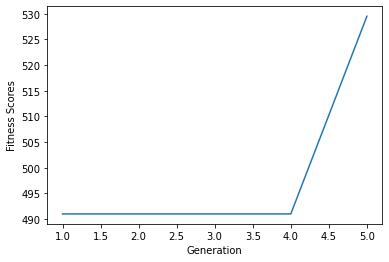

In [44]:
generation = [1, 2, 3, 4, 5]
plt.plot(generation,max_fitness_scores )
plt.xlabel('Generation')
plt.ylabel('Fitness Scores')

# Experiment 5

In [45]:
max_fitness_of_generation = 0.0
max_fitness_scores = []

for i in range(0,5):
    
    #Calling the initial Population Function
    Initial_Population=Create_Initial_Population(10)
    
    for val in range(0,10000):
        fitnessValue = []
        for i in range(len(Initial_Population)):
            
            fitness = Compute_Fitness(ItemWeights, Initial_Population[i])
            fitnessValue.append(fitness)
        max_fitness = max(fitnessValue)
        
        if(max_fitness > max_fitness_of_generation):
            max_fitness_of_generation = max_fitness
            
        # select parents
        selected_parents = []
        selected_parents = [Binary_Tournament_Selection(Initial_Population, fitnessValue)for _ in range(2)]
        
        p1 = selected_parents[0]
        
        p2 = selected_parents[1]
        global c1
        global c2
        c1 = []
        c2 = []
    
        
        c1,c2 = Mutation_Fuction(5,p1,p2)
        
        child1 = []
        child1[:0] = c1
        child2 = []
        child2[:0] = c2
    
        for i in range(0, len(child1)):
            child1[i] = int(child1[i])
        for i in range(0, len(child2)):
            child2[i] = int(child2[i])


        #Computing their Fitness
        c1Fitness = Compute_Fitness(ItemWeights, child1)
        c2Fitness = Compute_Fitness(ItemWeights, child2)
        
        #Generating new POPULATION
        if(c1Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))]= child1
                               
        if(c2Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))] = child2
        

        new_population = Initial_Population
    max_fitness_scores.append(max_fitness_of_generation)

In [46]:
print(max_fitness_scores)

[19.0, 19.5, 20.0, 20.0, 20.0]


Text(0, 0.5, 'Fitness Scores')

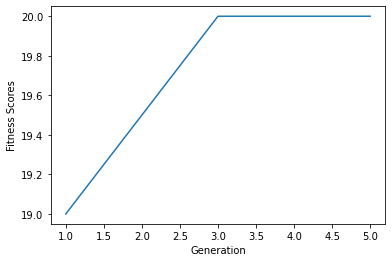

In [47]:
generation = [1, 2, 3, 4, 5]
plt.plot(generation,max_fitness_scores )
plt.xlabel('Generation')
plt.ylabel('Fitness Scores')

# Experiment 6

In [48]:
max_fitness_of_generation = 0.0
max_fitness_scores = []
for i in range(0,5):
    #Calling the initial Population Function
    Initial_Population=Create_Initial_Population(10)
    for val in range(0,10000):
        fitnessValue = []
        for i in range(len(Initial_Population)):
            
            fitness = Compute_Fitness(ItemWeights, Initial_Population[i])
            fitnessValue.append(fitness)
        max_fitness = max(fitnessValue)
        if(max_fitness > max_fitness_of_generation):
            max_fitness_of_generation = max_fitness
        # select parents
        selected_parents = []
        
        selected_parents = [Binary_Tournament_Selection(Initial_Population, fitnessValue)for _ in range(2)]
        
        p1 = selected_parents[0]
        
        p2 = selected_parents[1]
        global c1
        global c2
        c1 = []
        c2 = []
        
        c1,c2 = crossover(p1,p2)
        
        child1 = []
        child1[:0] = c1
        child2 = []
        child2[:0] = c2
    
        for i in range(0, len(child1)):
            child1[i] = int(child1[i])
        for i in range(0, len(child2)):
            child2[i] = int(child2[i])


        #Computing their Fitness
        c1Fitness = Compute_Fitness(ItemWeights, child1)
        c2Fitness = Compute_Fitness(ItemWeights, child2)
        
        #Generating new POPULATION
        if(c1Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))]= child1
                               
        if(c2Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))] = child2

        new_population = Initial_Population
    max_fitness_scores.append(max_fitness_of_generation)

In [49]:
print(max_fitness_scores)

[11.0, 13.5, 14.0, 14.0, 14.0]


Text(0, 0.5, 'Fitness Scores')

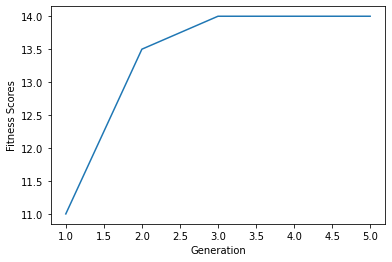

In [50]:
generation = [1, 2, 3, 4, 5]
plt.plot(generation,max_fitness_scores )
plt.xlabel('Generation')
plt.ylabel('Fitness Scores')

# Performing all the Experiments on instance 2


In [27]:
#Instance2: number of items n=200, items weights option 2, number of containers c=100

In [51]:
Containers = int(input("Please enter the number of containers(c): "))
Items = int(input("Please enter the number of items(𝑛): "))

#list of Item weights
ItemWeights=[]

#taking user option to set weights
opt = int(input("\nPlease choose one of the following options:\n[1] for weight i/2\n[2] for weight i^2/2 \nYour option:  "))
if opt == 1:
    for x in range(int(Items)):
        i = x+1
        #Option "1" for weights (i/2)
        ItemWeights.append(i/2) 
if opt == 2:
    for x in range(int(Items)):
        i = x+1
        #Option "2" for weights (i^2/2)
        ItemWeights.append(i**2/2) 

#Print the Search Space:
print("\nSearch Space: ")
print(Items**Containers)

Please enter the number of containers(c): 100
Please enter the number of items(𝑛): 200

Please choose one of the following options:
[1] for weight i/2
[2] for weight i^2/2 
Your option:  2

Search Space: 
126765060022822940149670320537600000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


# Experiment 1

In [52]:

max_fitness_of_generation = 0.0
max_fitness_scores = []
for i in range(0,5):
    #Calling the initial Population Function
    Initial_Population=Create_Initial_Population(10)
    
    for val in range(0,10000):
        fitnessValue = []
        for i in range(len(Initial_Population)):
            fitness = Compute_Fitness(ItemWeights, Initial_Population[i])
            fitnessValue.append(fitness)
        max_fitness = max(fitnessValue)
        if(max_fitness > max_fitness_of_generation):
            max_fitness_of_generation = max_fitness
        # select parents
        selected_parents = []
        selected_parents = [Binary_Tournament_Selection(Initial_Population, fitnessValue)for _ in range(2)]
        p1 = selected_parents[0]
        p2 = selected_parents[1]
        global c1
        global c2
        c1 = []
        c2 = []
        c1,c2 = crossover(p1,p2)
        Mutation_Fuction(1,c1,c2)

        child1 = []
        child1[:0] = c1
        child2 = []
        child2[:0] = c2
    
        for i in range(0, len(child1)):
            child1[i] = int(child1[i])
        for i in range(0, len(child2)):
            child2[i] = int(child2[i])
        #Computing their Fitness
        c1Fitness = Compute_Fitness(ItemWeights, child1)
        c2Fitness = Compute_Fitness(ItemWeights, child2)
    
        #Generating new POPULATION
        if(c1Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))]= child1
                               
        if(c2Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))] = child2
        
        
        #Printing new generated POPULATION
        new_population = Initial_Population
    max_fitness_scores.append(max_fitness_of_generation)

In [53]:
print(max_fitness_scores)

[68.0, 68.0, 72.5, 72.5, 74.5]


Text(0, 0.5, 'Fitness Scores')

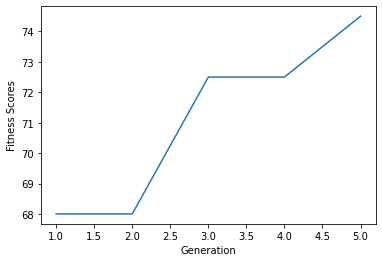

In [54]:
generation = [1, 2, 3, 4, 5]
plt.plot(generation,max_fitness_scores )
plt.xlabel('Generation')
plt.ylabel('Fitness Scores')

# Experiment 2

In [55]:
max_fitness_of_generation = 0.0
max_fitness_scores = []
for i in range(0,5):
    #Calling the initial Population Function
    Initial_Population=Create_Initial_Population(100)

    for val in range(0,10000):
        fitnessValue = []
        for i in range(len(Initial_Population)):
            fitness = Compute_Fitness(ItemWeights, Initial_Population[i])
            fitnessValue.append(fitness)
        max_fitness = max(fitnessValue)
        if(max_fitness > max_fitness_of_generation):
            max_fitness_of_generation = max_fitness
        # select parents
        selected_parents = []
        selected_parents = [Binary_Tournament_Selection(Initial_Population, fitnessValue)for _ in range(2)]
        
        p1 = selected_parents[0]
        p2 = selected_parents[1]
        global c1
        global c2
        c1 = []
        c2 = []
        c1,c2 = crossover(p1,p2)
        Mutation_Fuction(1,c1,c2)

        child1 = []
        child1[:0] = c1
        child2 = []
        child2[:0] = c2
    
        for i in range(0, len(child1)):
            child1[i] = int(child1[i])
        for i in range(0, len(child2)):
            child2[i] = int(child2[i])
        #Computing their Fitness
        c1Fitness = Compute_Fitness(ItemWeights, child1)
        c2Fitness = Compute_Fitness(ItemWeights, child2)
        
        #Generating new POPULATION
        if(c1Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))]= child1
                               
        if(c2Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))] = child2
            
        #Printing new generated POPULATION
        new_population = Initial_Population
    max_fitness_scores.append(max_fitness_of_generation)

In [56]:
print(max_fitness_scores)

[17631.0, 17631.0, 17631.0, 17657.5, 17657.5]


Text(0, 0.5, 'Fitness Scores')

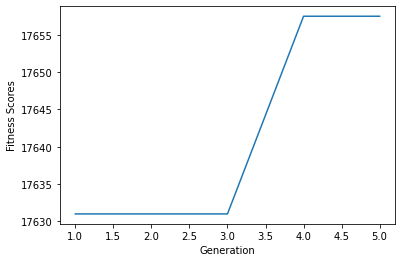

In [57]:
generation = [1, 2, 3, 4, 5]
plt.plot(generation,max_fitness_scores )
plt.xlabel('Generation')
plt.ylabel('Fitness Scores')

# Experiment 3

In [58]:
max_fitness_of_generation = 0.0
max_fitness_scores = []
for i in range(0,5):
    #Calling the initial Population Function
    Initial_Population=Create_Initial_Population(10)
    for val in range(0,10000):
        fitnessValue = []
        for i in range(len(Initial_Population)):
            fitness = Compute_Fitness(ItemWeights, Initial_Population[i])
            fitnessValue.append(fitness)
        max_fitness = max(fitnessValue)
        if(max_fitness > max_fitness_of_generation):
            max_fitness_of_generation = max_fitness
        # select parents
        selected_parents = []
        
        selected_parents = [Binary_Tournament_Selection(Initial_Population, fitnessValue)for _ in range(2)]
        
        p1 = selected_parents[0]
        p2 = selected_parents[1]
        global c1
        global c2
        c1 = []
        c2 = []
        c1,c2 = crossover(p1,p2)
        Mutation_Fuction(5,c1,c2)

        child1 = []
        child1[:0] = c1
        child2 = []
        child2[:0] = c2
    
        for i in range(0, len(child1)):
            child1[i] = int(child1[i])
        for i in range(0, len(child2)):
            child2[i] = int(child2[i])
        #Computing their Fitness
        c1Fitness = Compute_Fitness(ItemWeights, child1)
        c2Fitness = Compute_Fitness(ItemWeights, child2)
        
        #Generating new POPULATION
        if(c1Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))]= child1
                               
        if(c2Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))] = child2
            
        #Printing new generated POPULATION
        new_population = Initial_Population
    max_fitness_scores.append(max_fitness_of_generation)

In [59]:
print(max_fitness_scores)

[68.0, 97.0, 97.0, 97.0, 97.0]


Text(0, 0.5, 'Fitness Scores')

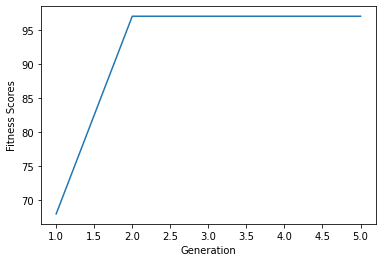

In [60]:
generation = [1, 2, 3, 4, 5]
plt.plot(generation,max_fitness_scores )
plt.xlabel('Generation')
plt.ylabel('Fitness Scores')

# Experiment 4

In [61]:
max_fitness_of_generation = 0.0
max_fitness_scores = []
for i in range(0,5):
    #Calling the initial Population Function
    Initial_Population=Create_Initial_Population(100)
    for val in range(0,10000):
        fitnessValue = []
        for i in range(len(Initial_Population)):
            fitness = Compute_Fitness(ItemWeights, Initial_Population[i])
            fitnessValue.append(fitness)
        max_fitness = max(fitnessValue)
        if(max_fitness > max_fitness_of_generation):
            max_fitness_of_generation = max_fitness
        # select parents
        selected_parents = []
        selected_parents = [Binary_Tournament_Selection(Initial_Population, fitnessValue)for _ in range(2)]
        
        p1 = selected_parents[0]
        p2 = selected_parents[1]
        global c1
        global c2
        c1 = []
        c2 = []
        c1,c2 = crossover(p1,p2)
        Mutation_Fuction(5,c1,c2)

        child1 = []
        child1[:0] = c1
        child2 = []
        child2[:0] = c2
    
        for i in range(0, len(child1)):
            child1[i] = int(child1[i])
        for i in range(0, len(child2)):
            child2[i] = int(child2[i])
        #Computing their Fitness
        c1Fitness = Compute_Fitness(ItemWeights, child1)
        c2Fitness = Compute_Fitness(ItemWeights, child2)
        
        #Generating new POPULATION
        if(c1Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))]= child1
                               
        if(c2Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))] = child2
            
        #Printing new generated POPULATION
        new_population = Initial_Population
    max_fitness_scores.append(max_fitness_of_generation)

In [62]:
print(max_fitness_scores)

[15084.0, 15084.0, 17649.0, 17748.5, 17852.0]


Text(0, 0.5, 'Fitness Scores')

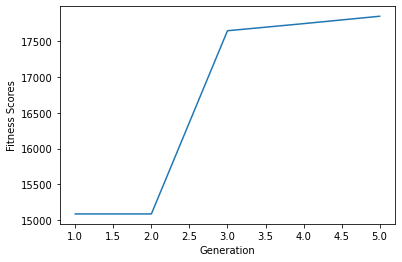

In [63]:
generation = [1, 2, 3, 4, 5]
plt.plot(generation,max_fitness_scores )
plt.xlabel('Generation')
plt.ylabel('Fitness Scores')

# Experiment 5

In [64]:
max_fitness_of_generation = 0.0
max_fitness_scores = []
for i in range(0,5):
    #Calling the initial Population Function
    Initial_Population=Create_Initial_Population(10)
    
    for val in range(0,10000):
        fitnessValue = []
        for i in range(len(Initial_Population)):
            fitness = Compute_Fitness(ItemWeights, Initial_Population[i])
            fitnessValue.append(fitness)
        max_fitness = max(fitnessValue)
        if(max_fitness > max_fitness_of_generation):
            max_fitness_of_generation = max_fitness
        # select parents
        selected_parents = []
        selected_parents = [Binary_Tournament_Selection(Initial_Population, fitnessValue)for _ in range(2)]
   
        p1 = selected_parents[0]
        p2 = selected_parents[1]
        global c1
        global c2
        c1 = []
        c2 = []
        c1,c2  = Mutation_Fuction(5,p1,p2)

        child1 = []
        child1[:0] = c1
        child2 = []
        child2[:0] = c2
    
        for i in range(0, len(child1)):
            child1[i] = int(child1[i])
        for i in range(0, len(child2)):
            child2[i] = int(child2[i])
        #Computing their Fitness
        c1Fitness = Compute_Fitness(ItemWeights, child1)
        c2Fitness = Compute_Fitness(ItemWeights, child2)
        
        #Generating new POPULATION
        if(c1Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))]= child1
                               
        if(c2Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))] = child2
            
        #Printing new generated POPULATION
        new_population = Initial_Population
    max_fitness_scores.append(max_fitness_of_generation)

In [65]:
print(max_fitness_scores)

[115.0, 115.0, 115.0, 122.5, 124.5]


Text(0, 0.5, 'Fitness Scores')

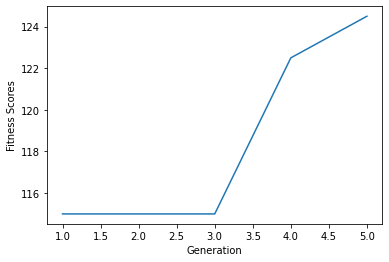

In [66]:
generation = [1, 2, 3, 4, 5]
plt.plot(generation,max_fitness_scores )
plt.xlabel('Generation')
plt.ylabel('Fitness Scores')

# Experiment 6

In [67]:
max_fitness_of_generation = 0.0
max_fitness_scores = []
for i in range(0,5):
    #Calling the initial Population Function
    Initial_Population=Create_Initial_Population(10)
    
    for val in range(0,10000):
        fitnessValue = []
        for i in range(len(Initial_Population)):
            fitness = Compute_Fitness(ItemWeights, Initial_Population[i])
            fitnessValue.append(fitness)
        max_fitness = max(fitnessValue)
        if(max_fitness > max_fitness_of_generation):
            max_fitness_of_generation = max_fitness
            
        # select parents
        selected_parents = []
        selected_parents = [Binary_Tournament_Selection(Initial_Population, fitnessValue)for _ in range(2)]

        p1 = selected_parents[0]
        p2 = selected_parents[1]
        global c1
        global c2
        c1 = []
        c2 = []
        c1,c2 = crossover(p1,p2)


        child1 = []
        child1[:0] = c1
        child2 = []
        child2[:0] = c2
    
        for i in range(0, len(child1)):
            child1[i] = int(child1[i])
        for i in range(0, len(child2)):
            child2[i] = int(child2[i])
        #Computing their Fitness
        c1Fitness = Compute_Fitness(ItemWeights, child1)
        c2Fitness = Compute_Fitness(ItemWeights, child2)
        
        #Generating new POPULATION
        if(c1Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))]= child1
                               
        if(c2Fitness < max(fitnessValue)):
            Initial_Population[fitnessValue.index(max(fitnessValue))] = child2
            
        #Printing new generated POPULATION
        new_population = Initial_Population
    max_fitness_scores.append(max_fitness_of_generation)

In [68]:
print(max_fitness_scores)

[62.5, 74.5, 74.5, 74.5, 74.5]


Text(0, 0.5, 'Fitness Scores')

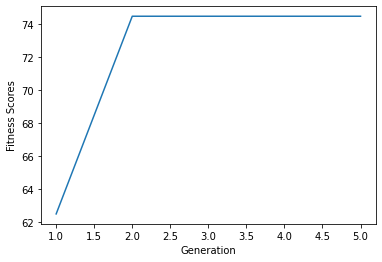

In [69]:
generation = [1, 2, 3, 4, 5]
plt.plot(generation,max_fitness_scores )
plt.xlabel('Generation')
plt.ylabel('Fitness Scores')